### 1. Introduction

In [1]:
from utils.plot_utils import *

#### 1.1 Explain carefully the difference between selling a call option and buying a put option.

Call option gives the holder the right to buy the underlying by a future date ($t$) for the price $K$. So selling a call option is giving whoever bought the call option from us, the right to buy from us. If the call option is not exercised ($S_T < K$) then out payoff will be 0. If it is exercised, then we will have to sell the underlying at $K$ when the spot price is $S_t$ incurring a negative payoff: $K-S_t$. So a general payoff is: 
$$\min{(K - S_t, 0)}$$
Put option gives the holder the right to sell the underlying by a future date ($t$) for the price $K$. So buying a put option will give us the right to buy from whoever sold the put option. If the put option is not exercised then our payoff is 0. If it is exercised, then we buy the underlying at $K$ when the spot price is $S_T$ giving a positive payoff of $K - S_t$. So the general payoff is: 
$$\max{(K - S_t, 0)}$$

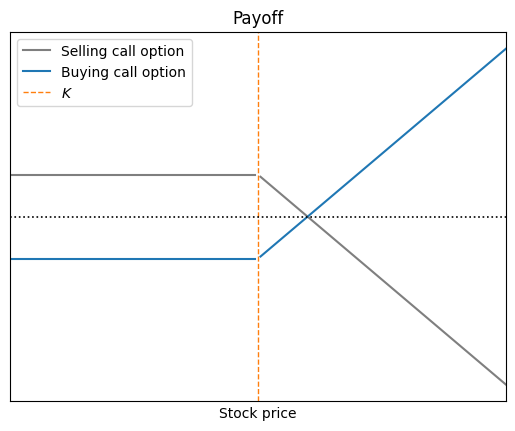

In [2]:
def q1():
    K = 10
    p = 1
    S = RangeVar('Stock price', np.linspace(K*0.5, K*1.5, 100))
    payoffs = [
        Payoff('Selling call option', lambda s: s*0 + p, domain=S, mask=lambda x: x <= K, color='tab:gray'),
        Payoff('', lambda s: (K - s) + p, domain=S, mask=lambda x: x >= K, color='tab:gray'),

        Payoff('Buying call option', lambda s: s*0 - p, domain=S, mask=lambda x: x <= K, color='tab:blue'),
        Payoff('', lambda s: (s - K) - p, domain=S, mask=lambda x: x >= K, color='tab:blue'),
    ]

    vlines = [VerticalLine(x=K, label=f"$K$", color="tab:orange")]

    plot_payoffs(payoffs, vlines=vlines, title='Payoff', ylabel='', show_x_ticks=False, show_y_ticks=False, grid=False)

q1()

#### 1.2 An investor enters into a short forward contract to sell 100,000 British pounds for U.S. dollars at an exchange rate of 1.3000 USD per pound. How much does the investor gain or lose if the exchange rate at the end of the contract is (a) 1.2900 and (b) 1.3200?

Short forward contract means that the investor is obligated to sell 100,000 GBP at a future date for 1.3 USD/GBP ($K$). At settlement, they will buy pounds at the market rate and deliver them at the contract rate.
- When $S_T = 1.2900 \rightarrow$ **Proceeds** from selling 100 000 GBP at $K$:  
    - $100\,000 \times 1.3000 \rightarrow$ **Cost** of purchasing 100 000 GBP at $S_T$:  
    - $100\,000 \times 1.2900 \rightarrow$ **Profit**: $100\,000\,(1.3000 - 1.2900) = +1\,000\text{ USD}.$
- When $S_T = 1.3200 \rightarrow$ **Proceeds** from selling 100 000 GBP at $K$: 
    - $100\,000 \times 1.3000 \rightarrow$ **Cost** of purchasing 100 000 GBP at $S_T$:
    - $100\,000 \times 1.3200 \rightarrow$ **Profit**: $100\,000\,(1.3000 - 1.3200) = -2\,000\text{ USD (loss)}.$

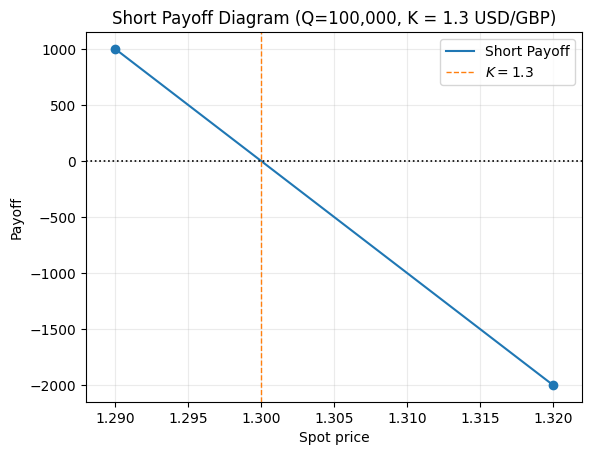

In [3]:
def q2():  
    K = 1.3000  # Contract price
    Q = 100000  # Notional amount

    S = RangeVar('Spot price', np.linspace(1.288, 1.322, 100))

    payoffs = [ 
        Payoff('Short Payoff', lambda s: Q * (K - s), domain=S, 
               mask= lambda x: (x >= 1.29) & (x <= 1.32), 
               highlight_x=[1.29, 1.32], color='tab:blue')
    ]

    vlines = [VerticalLine(x=K, label=f"$K = {K}$", color="tab:orange")]

    plot_payoffs(payoffs, vlines=vlines, title="Short Payoff Diagram (Q=100,000, K = 1.3 USD/GBP)")

q2()

#### 1.3 A trader enters into a short cotton futures contract when the futures price is 50 cents per pound. The contract is for the delivery of 50,000 pounds. How much does the trader gain or lose if the cotton price at the end of the contract is (a) 48.20 cents per pound and (b) 51.30 cents per pound?

Short futures contract means that the trader is obligated to sell 50,000 pounds of cotton at a future date for 50 cents ($K$). At settlement, they will buy cotton at the spot rate and deliver them at the contract rate
- When $S_T = 0.4820 \rightarrow$ **Proceeds** from selling 50,000 lbs at $K$:
  - $50\,000 \times 0.50\rightarrow$ **Cost** of purchasing 50,000 lbs at $S_T$:
  - $50\,000 \times 0.4820 \rightarrow$ **Profit**: $50\,000\,(0.50 - 0.4820) = +900\text{ USD}.$
- When $S_T = 0.5130 \rightarrow$ **Proceeds** from selling 50,000 lbs at $K$:
  - $50\,000 \times 0.50 \rightarrow$ **Cost** of purchasing 50,000 lbs at $S_T$:
  - $50\,000 \times 0.5130 \rightarrow$ **Profit**: $50\,000\,(0.50 - 0.5130) = -650\text{ USD (loss)}.$

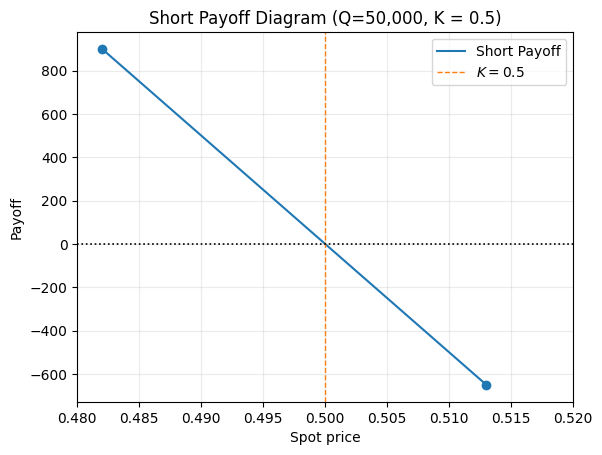

In [4]:
def q3():  
    K = 0.5
    Q = 50000

    S = RangeVar('Spot price', np.linspace(0.48, 0.52, 100))

    short_pf = Payoff('Short Payoff', lambda s: Q * (K - s), domain=S, 
                      mask= lambda x: (x >= 0.482) & (x <= 0.513), 
                      highlight_x=[0.482, 0.513], color='tab:blue')

    plot_payoffs([short_pf], vlines=[VerticalLine(x=K, label=f"$K = {K}$", color="tab:orange")],
                 title="Short Payoff Diagram (Q=50,000, K = 0.5)")

q3()

#### 1.4 Suppose that you write a put contract with a strike price of $\$40$ and an expiration date in 3 months. The current stock price is $\$41$ and the contract is on 100 shares. What have you committed yourself to? How much could you gain or lose?

The above put option on 100 shares will give the holder right to sell the 100 shares at $K=\$40$ / share by 3 months. Writing a put contract (selling the put contract) will give someone else the right to sell to us 100 shares at $\$40$ per share if they choose to exercise (only when price falls below $\$40$) it within 3 months.
If the put option is exercised and the spot price of the share is 20, we lose $\$20$ per share = $\$2000$. The worst case scenario is for the stock price falling to almost zero during the three-month period, this would cost $\$4,000$\.

#### 1.5 You would like to speculate on a rise in the price of a certain stock. The current stock price is $\$29$ and a 3-month call with a strike price of $\$30$ costs $\$2.90$. You have $\$5,800$ to invest. Identify two alternative investment strategies, one in the stock and the other in an option on the stock. What are the potential gains and losses from each?

Lets say the share price after three months is $S_t$.
First strategy using stocks, we would buy $5800 / 29 = 200 \text{ shares}$, then the Profit/Loss: $200 * (S_t - 29)$.
Gains are unbounded but the maximum loss that can happen is: 

Second strategy buying call option (gives right to buy), we would buy $5800 / 2.9 = 2000 \text{ call options}$, then our Profit/Loss: $2000 * (S_t - 30) - 5800$ 

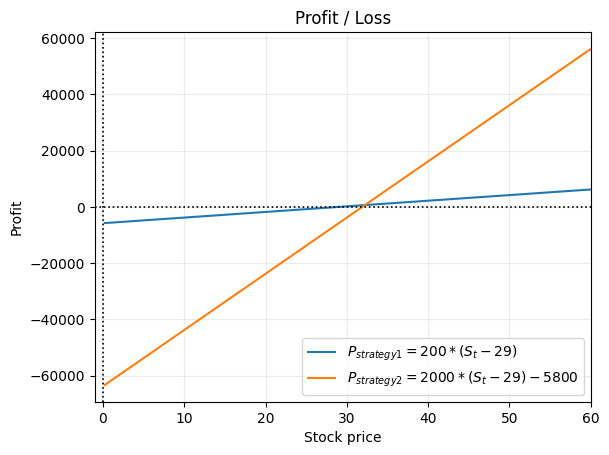

In [5]:
def q5():  
    K = 30
    K2 = 50000

    S = RangeVar('Stock price', np.linspace(-1, 60, 100))

    plot_payoffs([
        Payoff(r"$P_{strategy1} = 200 * (S_t - 29)$", lambda s: 200 * (s - 29), domain=S, mask=lambda x: x >= 0),
        Payoff(r"$P_{strategy2} = 2000 * (S_t - 29) - 5800$", lambda s: 2000 * (s - 29) - 5800, domain=S, mask=lambda x: x >= 0)
    ], title="Profit / Loss", ylabel="Profit")

q5()

#### 1.6 Suppose that you own 5,000 shares worth $\$25$ each. How can put options be used to provide you with insurance against a decline in the value of your holding over the next 4 months?

I can buy 5000/100 = 50 put options (which will give me the right to sell the underlying asset) with maturity of 4 months and strike price of $\$25$. If the price falls below I can exercise the option and sell the shares at $\$25$ per share.

#### 1.7 When first issued, a stock provides funds for a company. Is the same true of a stock option? Discuss.

No, a stock option does not provide funds for a company. It's traded between one investor to the next where the company had nothing to do with it unlike stocks.

#### 1.8. Explain why a futures contract can be used for either speculation or hedging.

Futures contracts can be used for hedging when we have exposure to the price of an asset, because a futures contract can offset the asset’s price movements. A long futures position can hedge against a loss from an increase in the price of the underlying for someone who is short the underlying, and a short futures position can hedge against a loss from a price decrease in the underlying for someone who is long the underlying.

When there is no exposure then futures contract is used for speculation. For a long futures position, an increase in the asset’s price will result in a gain, and a decrease will result in a loss. For a short futures position, a decrease in the asset’s price will result in a gain, and an increase will result in a loss.

#### 1.9 Suppose that a March call option to buy a share for $\$50$ costs $\$2.50$ and is held until March. Under what circumstances will the holder of the option make a profit? Under what circumstances will the option be exercised? Draw a diagram illustrating how the profit from a long position in the option depends on the stock price at maturity of the option.

The call option holder has the right to buy the share for $\$50$ by the end of march. Buying the option will incur a cost of $\$2.50$. If the option is not exercised then it's a loss of $\$2.5$ for the holder. If the stock price at the end of the march ($S_t$) is above $\$50$, the option holder will buy the stock at $\$50$ (because the option will be exercised) and they can immediately sell at a higher price for Profit: $$S_t - 50 - 2.5 = S_t - 52.5$$So the holder will make a profit ($S_t - 52.5 > 0 \rightarrow S_t > 52.5$) once the stock price is above $\$52.5$.

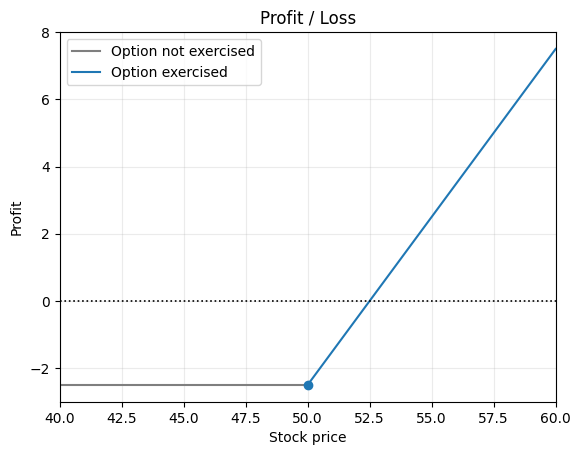

In [6]:
def q9():
    K = 50
    S = RangeVar('Stock price', np.linspace(40, 60, 100))
    payoffs = [
        Payoff('Option not exercised', lambda s: s*0 -2.5, domain=S, mask=lambda x: x < K, color='tab:gray'),
        Payoff('Option exercised', lambda s: (s - (K + 2.5)), domain=S, mask=lambda x: x >= K, highlight_x=[K], color='tab:blue'),
    ]
    plot_payoffs(payoffs, title='Profit / Loss', ylabel='Profit')
    
q9()

#### 1.10. Suppose that a June put option to sell a share for $\$60$ costs $\$4$ and is held until June. Under what circumstances will the seller of the option (i.e., the party with the short position) make a profit? Under what circumstances will the option be exercised? Draw a diagram illustrating how the profit from a short position in the option depends on the stock price at maturity of the option.

A June put option gives the right to sell the share at $\$60$ (strike price $K$) until June. The option will be exercised if the share price is lower than the strike price. So for the seller of the put option will profit when the option is not exercised and when the spot price, $S_t > K$, the seller will have the obligation to buy at $\$60$ price instead of a higher spot price. Profit: $4 + (60 - S_t)$.

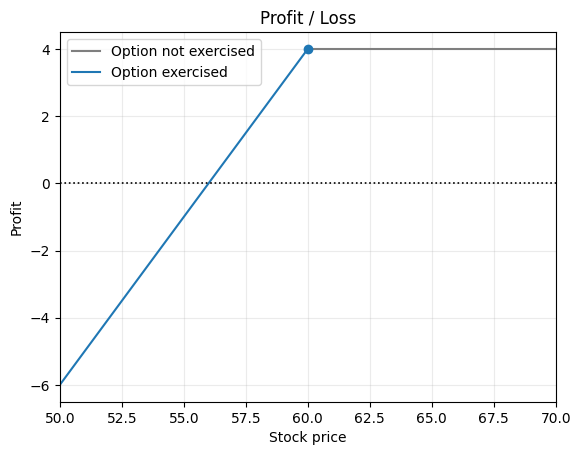

In [7]:
def q10():
    K = 60
    S = RangeVar('Stock price', np. linspace(50, 70, 100))
    
    payoffs = [
        Payoff('Option not exercised', lambda s: s*0 + 4.0, domain=S, mask=lambda x: x >= K, color='tab:gray'),
        Payoff('Option exercised', lambda s: 4.0 + (s - K), domain=S, mask=lambda x: x < K, highlight_x=[K], color='tab:blue'),
    ]
    plot_payoffs(payoffs, title='Profit / Loss', ylabel='Profit')
    
q10()

#### 1.11. It is May and a trader writes a September call option with a strike price of $\$20$. The stock price is $\$18$ and the option price is $\$2$. Describe the trader’s cash flows if the option is held until September and the stock price is $\$25$ at that time.

The trader sells a call option (holder has the right to buy) with $K = \$20$. $S_0 = \$18$, and option price is $\$2$. Option is held until $S_t = \$25$
The option is exercised when the $K < S_t$ and the trader will have to sell the stock at $K$ instead of $S_t$

| Time | Inflow | Outflow | Explanation                                                              |
| :--- | -----: | ------: | ------------------------------------------------------------------------ |
| May  |     +4 |         | Selling the call option.                                                 |
| Sept |    +20 |     -25 | Buy the stock at ($S_t$) 25 and sell at ($K$) 20 to fullfill obligation. |


#### 1.12. A trader writes a December put option with a strike price of $\$30$. The price of the option is $\$4$. Under what circumstances does the trader make a gain?

The trader sells a put option (holder has the right to sell) with $K = \$30$. The option is exercised when the spot price of the stock falls below the strike price and when it does the trader will be obliged to buy the stock at $\$30$ which is higher than the market price incurring a loss. Their profit/loss after option is exercised is: $4 + S_t - 30$.

The trader will make gains when the spot price is above 26: $$4 + S_t - 30 > 0 \Rightarrow S_t > 26$$

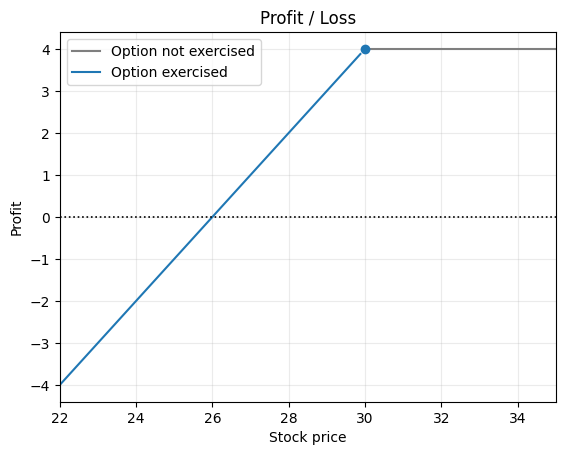

In [8]:
def q12():
    K = 30
    S = RangeVar('Stock price', np. linspace(22, 35, 100))
    
    payoffs = [
        Payoff('Option not exercised', lambda s: s*0 + 4.0, domain=S, mask=lambda x: x >= K, color='tab:gray'),
        Payoff('Option exercised', lambda s: 4.0 + (s - K), domain=S, mask=lambda x: x < K, highlight_x=[K], color='tab:blue'),
    ]
    plot_payoffs(payoffs, title='Profit / Loss', ylabel='Profit')
    
q12()

#### 1.13. A company knows that it is due to receive a certain amount of a foreign currency in 4 months. What type of option contract is appropriate for hedging?

There are two options to buy:
- Put $\rightarrow$ sell $\rightarrow$ exercised when underlying $S_t \downarrow$ such that $S_t < K$ and sell it at K for gains.
- Call $\rightarrow$ buy $\rightarrow$ exercised when underlying $S_t \uparrow$ such that $S_t > K$ and can buy it at K for gains.

It's not good for the company if the foreign currency falls in value (depreciates) as they'll receive less home currency so the company should look into buying the put option that gives them payoff when the foreign currency falls. 

So a long position in the 4 month put option on the foreign currency, then they can sell for at least K.

#### 1.14. A U.S. company expects to have to pay 1 million Canadian dollars in 6 months. Explain how the exchange rate risk can be hedged using (a) a forward contract and (b) an option.

- A long position in the forward contract to buy 1 million Canadian dollars in 6 months. This essentially locks the exchange rate.
- A 6 month call option will give them the right to buy at K. If the Canadian dollar falls then the company benefits and the contract expires, if the Canadian dollar rises then the option is exercised essentially locking the exchange rate.

#### 1.15. A trader enters into a short forward contract on 100 million yen. The forward exchange rate is $0.0090 per yen. How much does the trader gain or lose if the exchange rate at the end of the contract is (a) $\$0.0084$ per yen and (b) $\$0.0101$ per yen?

Short forward contract on 100 million yen, where $K = \$0.0090/\yen$.
- When exchange rate is $S_t = \$0.0084/\yen$: $$100000000 * (0.0090 - 0.0084) = \$60,000\text{ (Profit)}$$
- When exchange rate is $S_t = \$0.0101/\yen$: $$100000000 * (0.0090 - 0.0101) = -\$110,000 \text{ (Loss)}$$

#### 1.16. The CME Group offers a futures contract on long-term Treasury bonds. Characterize the traders likely to use this contract.

- Hedge an exposure to long-term interest rates.
- Speculate on the future direction of long-term interest rates.
- Arbitrage between the spot and futures markets for Treasury bonds

#### 1.17. “Options and futures are zero-sum games.” What do you think is meant by this?

It means that profit on one side equals loss on the other. So in total the net gain to the two sides is zero.

#### 1.18. Describe the profit from the following portfolio: a long forward contract on an asset and along European put option on the asset with the same maturity as the forward contract and a strike price that is equal to the forward price of the asset at the time the portfolio is set up.

The portfolio has:
- A long european (exercised at maturity) put option (right to sell at strike price $K$) on maturity.
- A long forward contract on asset with maturity t with forward price K. (Obligation to buy the asset at $K$)
Lets say the spot price of the asset at maturity is $S_t$ and the premium paid was p.
- Forward: $S_t - K$
- Option: 
    - When $S_t \uparrow$ so $S_t > K$, option expires: $\text{Loss} = - p$
    - When $S_t \downarrow$ so $S_t < K$, option exercises: $\text{Profit} =  K - S_t - p$
- Total:
    - When $S_t \uparrow$ so $S_t > K$, option expires: $\text{Profit} = S_t - K - p$
    - When $S_t \downarrow$ so $S_t < K$, option exercises: $\text{Loss} =  - p$

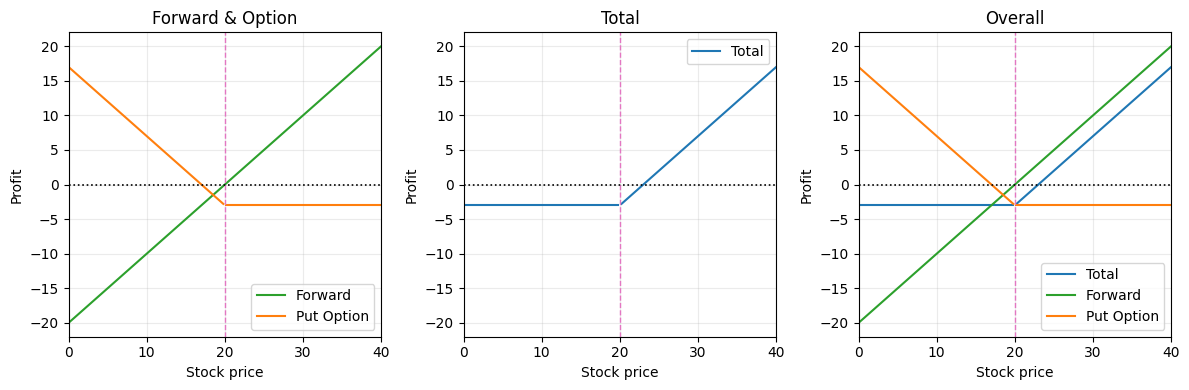

In [33]:
def q18():
    K = 20
    p = 3
    S = RangeVar("Stock price", np.linspace(0, K*2, 100))

    forward = Payoff("Forward", lambda s: s - K, domain=S, color="tab:green")

    option = [
        Payoff('Put Option', lambda s: s*0 -p, domain=S, mask=lambda s: s >= K, color='tab:orange'),
        Payoff('', lambda x: K - x - p, domain=S, mask=lambda s: s < K, color='tab:orange')
    ]

    panel1 = Panel([forward] + option, vlines=[VerticalLine(K, '', 'tab:pink')],
                   title='Forward & Option', y_min= -22, y_max=22, 
                   xlabel='Stock price', ylabel='Profit')
    
    total = [ 
        Payoff('Total', lambda s: s*0 -p, domain=S, mask=lambda s: s <= K, color='tab:blue'), 
        Payoff('', lambda s: s - K - p, domain=S, mask=lambda s: s > K, color='tab:blue')
    ]
    
    panel2 = Panel(total, vlines=[VerticalLine(K, '', 'tab:pink')],
                   title='Total', y_min= -22, y_max=22, 
                   xlabel='Stock price', ylabel='Profit')
    
    panel3 = Panel(total + [forward] + option, vlines=[VerticalLine(K, '', 'tab:pink')], 
                   title = 'Overall', y_min=-22, y_max=22, xlabel='Stock price', ylabel='Profit')
    plot_panels([panel1, panel2, panel3], nrows=1, ncols=3, figsize=(12, 4), main_title='')

q18()

#### 1.19. In the 1980s, Bankers Trust developed index currency option notes (ICONs). These were bonds in which the amount received by the holder at maturity varied with a foreign exchange rate. One example was its trade with the Long Term Credit Bank of Japan. The ICON specified that if the yen/USD exchange rate, ST, is greater than 169 yen per dollar at maturity (in 1995), the holder of the bond receives $\$1,000$. If it is less than 169 yen per dollar, the amount received by the holder of the bond is: $$1,000 - \max\left(0, 1000\left(\frac{169}{S_T}\right) - 1\right)$$When the exchange rate is below 84.5, nothing is received by the holder at maturity. Show that this ICON is a combination of a regular bond and two options.

The ICON payoff:
- When $S_t > 169 \Rightarrow \$1000$
- When $169 \ge S_t \ge 84.5 \Rightarrow 2000 - 169000/S_t$
- When $S_t < 84.5 \Rightarrow \$0$

Let $X = \frac{169}{S_t}$

This gives:
- When $X < 1 \Rightarrow \$1000$
- When $1 \le X \le 2 \Rightarrow 2000 - 1000X$
- When $X > 2 \Rightarrow 0$

This can be thought of as combination of:
- Bond where:
    - $1000
- Option where:
    - When $X < 1 \Rightarrow 0 \text{(premium)}$
    - When $X \ge 1 \Rightarrow 1000(1 - X)$
- Option where:
    - When $X < 2 \Rightarrow 0$
    - When $X \ge 2 \Rightarrow 1000(X - 2)$

Replacing X with $S_t$

- Bond where:
    - $1000
- Option where:
    - When $S_t > 169 \Rightarrow 0$
    - When $S_t \le 169 \Rightarrow 169000(\frac{1}{169} - \frac{1}{S_t})$
- Option where:
    - When $S_t > 84.5 \Rightarrow 0$
    - When $S_t \le 84.5 \Rightarrow 169000(\frac{1}{S_t} - \frac{1}{84.5})$

So it's a combination of a zero-coupon bond ($1000), a short position in a call option on the USD/yen (opposite of yen/USD) exchange rate with strike  1/169, and a long position in a call option on the USD/yen exchange rate with strike 1/84.5.

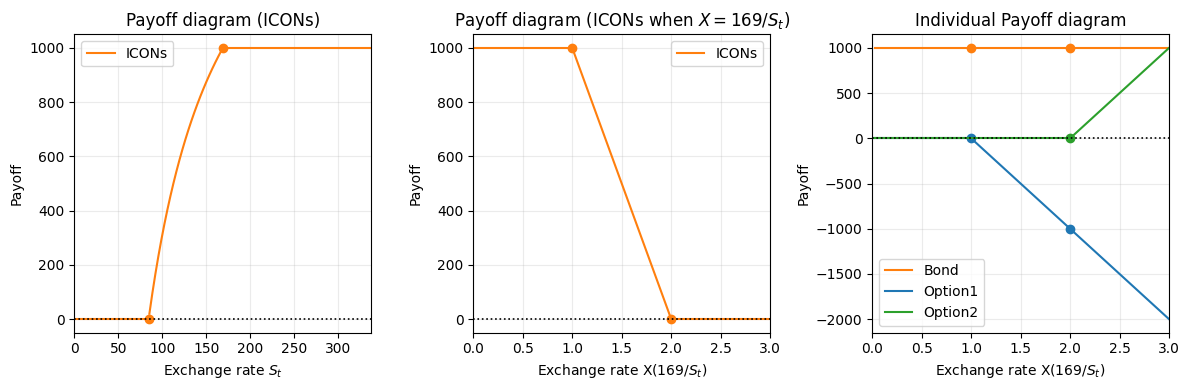

In [30]:
def q19():
    K1 = 169
    K2 = 84.5

    # icons_panel: Payoff vs S_t
    S = RangeVar('S_t', np.linspace(1e-12, K1*2, 100))

    icon_payoff = [
        Payoff('ICONs', lambda s: 0 * s + 1000, domain=S, mask=lambda s: s > K1, color='tab:orange'),
        Payoff('', lambda s: 2000 - 1000 * (K1 / s), domain=S, mask=lambda s: (s >= K2) & (s <= K1), highlight_x=[K1, K2], color='tab:orange'),
        Payoff('', lambda s: 0 * s + 0.0, domain=S, mask=lambda s: s < K2, color='tab:orange')
    ]

    icons_panel = Panel(icon_payoff, title='Payoff diagram (ICONs)', xlabel='Exchange rate $S_t$', ylabel='Payoff')

    # icons_panel_x: Payoff vs X = 169/S_t
    X = RangeVar('X = 169/S_t', np. linspace(0, 3, 100))

    icon_payoff_x = [
        Payoff('ICONs', lambda x: 0 * x + 1000, domain=X, mask=lambda x: x < 1, color='tab:orange'),
        Payoff('', lambda x: 2000 - 1000 * x, domain=X, mask=lambda x: (x >= 1) & (x <= 2), highlight_x=[1, 2], color='tab:orange'),
        Payoff('', lambda x: 0 * x + 0.0, domain=X, mask=lambda x: x > 2, color='tab:orange')
    ]

    icons_panel_x = Panel(icon_payoff_x, title='Payoff diagram (ICONs when $X = 169/S_t$)', xlabel='Exchange rate X($169/S_t$)', ylabel='Payoff')

    # individual_panel: Individual components
    p = 0
    
    individual_payoffs = [
        Payoff('Bond', lambda x: 0 * x + 1000, domain=X, mask=lambda x: x > 0, highlight_x=[1, 2], color='tab:orange'),

        Payoff('Option1', lambda x: 0 * x + p, domain=X, mask=lambda x: x < 1, color='tab:blue'),
        Payoff('', lambda x: 1000 * (1 - x) + p, domain=X, mask=lambda x: x >= 1, highlight_x=[1, 2], color='tab:blue'),

        Payoff('Option2', lambda x: 0 * x + -p, domain=X, mask=lambda x: x < 2, color='tab:green'),
        Payoff('', lambda x: 1000 * (x - 2) - p, domain=X, mask=lambda x: x >= 2, highlight_x=[2], color='tab:green'),
    ]

    individual_panel = Panel(individual_payoffs, title='Individual Payoff diagram', xlabel='Exchange rate X($169/S_t$)', ylabel='Payoff')

    plot_panels([icons_panel, icons_panel_x, individual_panel], nrows=1, ncols=3, figsize=(12, 4))

q19()

#### 1.20 On July 1, 2021, a company enters into a forward contract to buy 10 million Japanese yen on January 1, 2022. On September 1, 2021, it enters into a forward contract to sell 10 million Japanese yen on January 1, 2022. Describe the payoff from this strategy.

